# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Movie Data Analysis 

> This movie data was downloaded from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) through [ALX](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf). Each row in this dataset corresponds to each movie and their characteriastics. For the purpose of this analysis, i would be considering the following columns;
 - budget_adj
 - revenue_adj
 - runtime
 - genres
 - vote_average
 - release year
 - release month


### Question(s) for Analysis
- Has profitability of making movies changed over the years, by how much?
- Does movies runtime have an impact on the average voting and profitability?
- Does the movie release month have an impact on its profitability?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import calendar 

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#load the movie data
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_movies.shape

(10866, 21)

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The information above shows there are some missing values in the data. Below, we find how much values are missing and in which columns. 

In [5]:
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The informations above show how many rows values are missing in each columns. The good news is that some of them are not needed for our analysis except for genres which has 23 missing values. Now, let's proceed by checking for duplicate rows, they will be removed if any is found. 

In [6]:
df_movies.duplicated().sum()

1

In [7]:
df_movies.drop_duplicates(inplace=True)

#comfirm duplicate has been removed
df_movies.duplicated().sum()

0

Having removed duplicate rows, now we remove columns that are not relevant to our analysis

In [8]:
df_movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df_movies.drop(['id', 'imdb_id', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'tagline', 'keywords', 'overview',
        'production_companies'], inplace=True,  axis = 1)

#comfirm those columns has been removed
df_movies.head()

,popularity,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df_movies.isnull().sum()

popularity       0
director        44
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [11]:
#drop rows with null values in director and genres
df_movies = df_movies.dropna(subset=['director', 'genres'])

#comfirmation
df_movies.isnull().sum()

popularity      0
director        0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

Now, we check the data decription for insight on what to do next. 

In [12]:
df_movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,1.080000e+04,1.080000e+04
mean,0.649455,102.189722,218.600741,5.970880,2001.289537,1.765437e+07,5.167714e+07
std,1.002441,30.783873,577.165055,0.933006,12.819545,3.438403e+07,1.450182e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209157,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385471,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.717508,111.250000,147.000000,6.600000,2011.000000,2.103337e+07,3.408743e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This summary statistics shows the minimum runtime, budget_adj and revenue_adj is 0 which is quite not interestine. Also, we could see that in budget_adj and revenue_adj, the 0 values occupy up to 50 percentile of the data which leaves us in a difficult situation because we can't just discard them, else we loose a lot of data. In order to handle this, we fill the 0 values with NaN and then forward filled. 

In [13]:
#drop movies with 0 runtime
df_movies = df_movies[df_movies.runtime != 0]

# replace the 0 values in budget_adj and revenue_adj with NaN
df_movies['budget_adj'] = df_movies['budget_adj'].replace(0, np.NAN)
df_movies['revenue_adj'] = df_movies['revenue_adj'].replace(0, np.NAN)

# Forwardfill missing values in bugdet_adj and revenue_adj 
df_movies.fillna(method = 'ffill', inplace = True)

In [14]:
df_movies.isnull().sum()

popularity      0
director        0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [15]:
df_movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10772.000000,10772.000000,10772.000000,10772.000000,10772.000000,1.077200e+04,1.077200e+04
mean,0.650643,102.455347,219.114463,5.972289,2001.265503,2.706367e+07,7.341960e+07
std,1.003319,30.379156,577.826118,0.932877,12.825332,3.538083e+07,1.508924e+08
min,0.000188,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209987,90.000000,17.000000,5.400000,1995.000000,4.604091e+06,2.509532e+06
50%,0.386176,99.000000,39.000000,6.000000,2006.000000,1.455379e+07,2.145204e+07
75%,0.718889,112.000000,147.000000,6.600000,2011.000000,3.500000e+07,7.530421e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Nice! the next tasks are to create column to store profit made from each movie and then split genres for further exploration. 

In [16]:
#create profit column
df_movies['profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']

#split genres
split_genres = df_movies['genres'].str.get_dummies()

# merge the splited genres with main dataframe
df_movies = pd.concat([df_movies, split_genres], axis=1)

df_movies.head()

,popularity,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#drop genres since it has been splitted
df_movies.drop('genres', inplace = True, axis = 1)

In [18]:
# Change release_date to datatime form
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Extract month from release_date column
df_movies['release_month'] = df_movies['release_date'].dt.month_name()

df_movies.head()

,popularity,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_month
0,32.985763,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,...,0,0,0,0,1,0,1,0,0,June
1,28.419936,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,...,0,0,0,0,1,0,1,0,0,May
2,13.112507,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,...,0,0,0,0,1,0,1,0,0,March
3,11.173104,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,...,0,0,0,0,1,0,0,0,0,December
4,9.335014,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,...,0,0,0,0,0,0,1,0,0,April


Now, I am done with data wrangling

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Has the profitability of making movies changed over the year?

In [19]:
#group dataframe by profit and release year

profit_growth = df_movies.groupby('release_year')['profit_adj'].sum()

profit_growth

release_year
1960    2.782912e+09
1961    2.946758e+09
1962    2.552622e+09
1963    2.325072e+09
1964    2.792358e+09
1965    7.431550e+09
1966    3.945663e+09
1967    7.350404e+09
1968    3.311300e+09
1969    2.747956e+09
1970    3.413423e+09
1971    1.002015e+10
1972    9.800020e+09
1973    1.080911e+10
1974    8.655127e+09
1975    5.338596e+09
1976    1.028300e+10
1977    1.107450e+10
1978    4.779750e+09
1979    7.125620e+09
1980    5.342960e+09
1981    5.165204e+09
1982    6.298684e+09
1983    5.069076e+09
1984    5.398092e+09
1985    5.071291e+09
1986    4.723166e+09
1987    6.896176e+09
1988    6.239843e+09
1989    8.608025e+09
1990    8.512330e+09
1991    5.372189e+09
1992    1.006244e+10
1993    8.474197e+09
1994    8.458450e+09
1995    1.253075e+10
1996    6.539746e+09
1997    8.598144e+09
1998    9.384196e+09
1999    8.248129e+09
2000    9.928679e+09
2001    1.118809e+10
2002    1.287302e+10
2003    1.237690e+10
2004    1.175282e+10
2005    1.126346e+10
2006    1.016571e+10


In [20]:
#function for matplotlib

def plot_graph(column, graphType, graphTitle, x_label, y_label):
    fig = plt.figure()
    fig.set_size_inches(30,15)
    column.plot(kind=graphType)
    plt.title(graphTitle, fontsize=30)
    plt.xlabel(x_label, fontsize=30)
    plt.ylabel(y_label, fontsize=30)
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    plt.grid()

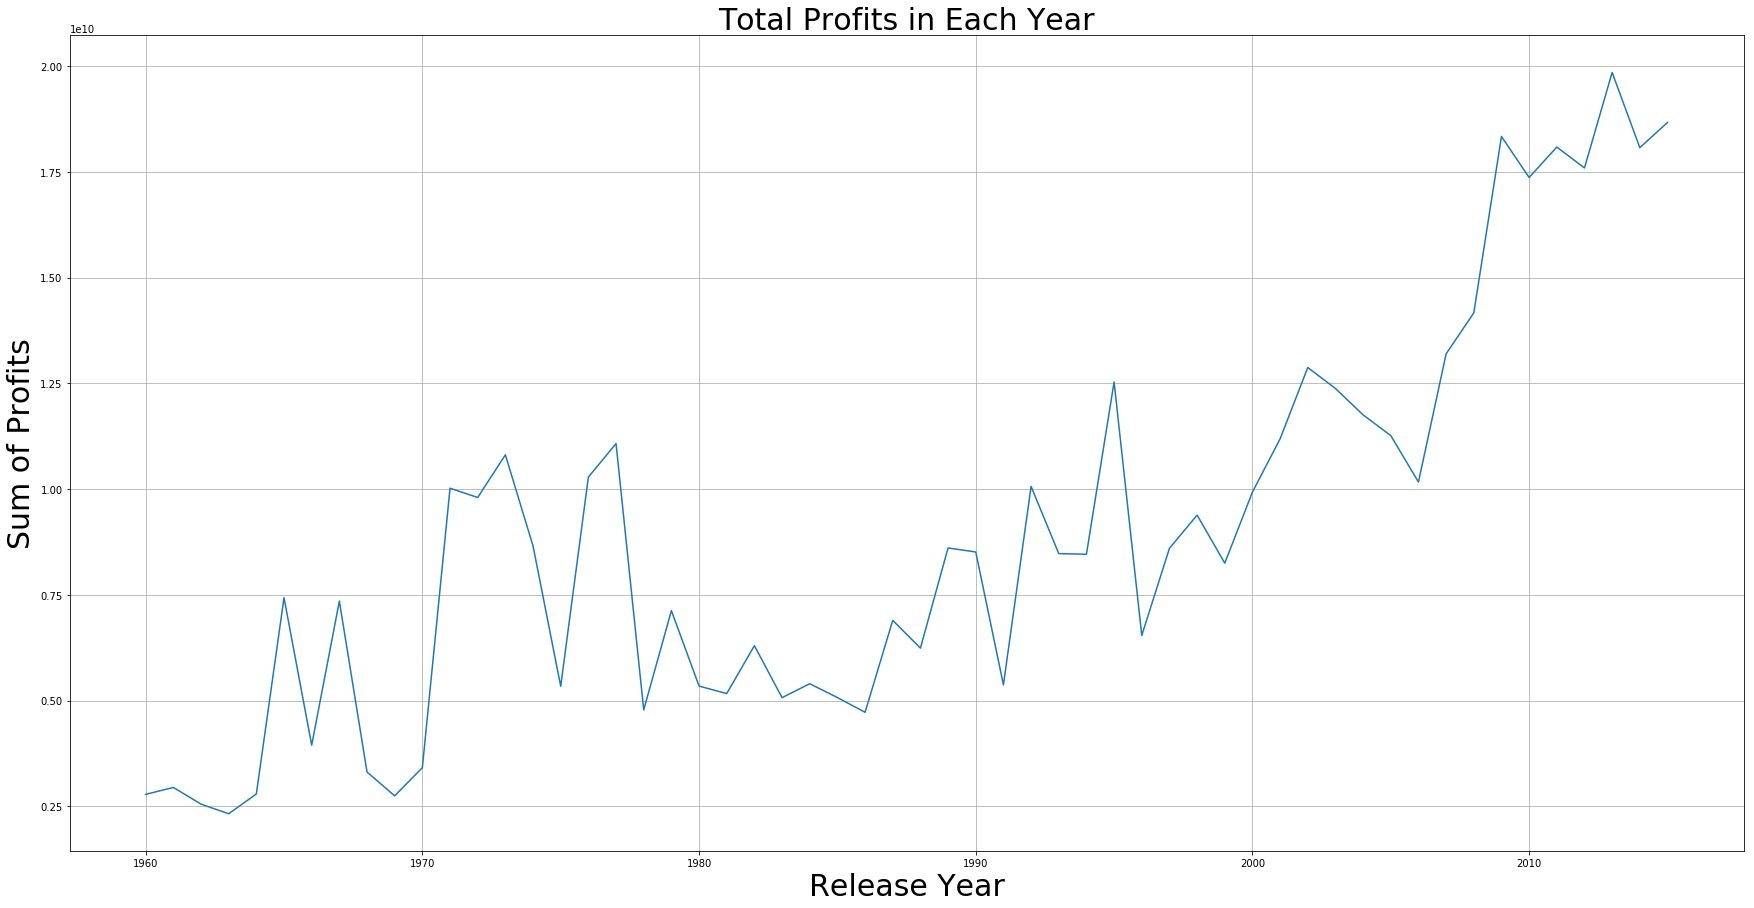

In [21]:
plot_graph(profit_growth, 'line', 'Total Profits in Each Year', 'Release Year', 'Sum of Profits')

This plot shows a non-linear profit increament from 1960 to 2010. Also, we could check which genre has the highest overall profit over the years. 

In [22]:
genre_profit_growth = df_movies.groupby('profit_adj').sum()
genre_profit_growth.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
profit_adj,,,,,,,,,,,,,,,,,,,,,
-4.139124e+08,0.628437,144,105,12.9,4020,8.500000e+08,2.217514e+07,1,1,0,...,0,0,0,0,0,0,0,1,0,1
-2.249399e+08,0.451088,299,81,16.1,6018,6.814516e+08,6.631835e+06,0,0,0,...,0,0,0,0,2,0,0,1,0,0
-1.998365e+08,1.210502,78,218,6.6,1995,2.504192e+08,5.058267e+07,0,1,1,...,0,0,0,0,1,0,0,0,0,0
-1.648016e+08,0.952027,99,126,7.2,2001,1.687139e+08,3.912290e+06,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-1.551102e+08,1.214510,149,1607,6.0,2013,2.386885e+08,8.357833e+07,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
genre_profit_growth = genre_profit_growth.drop(['popularity', 'runtime', 'vote_average',
                                  'release_year','budget_adj', 'revenue_adj', 'vote_count'], axis = 1)

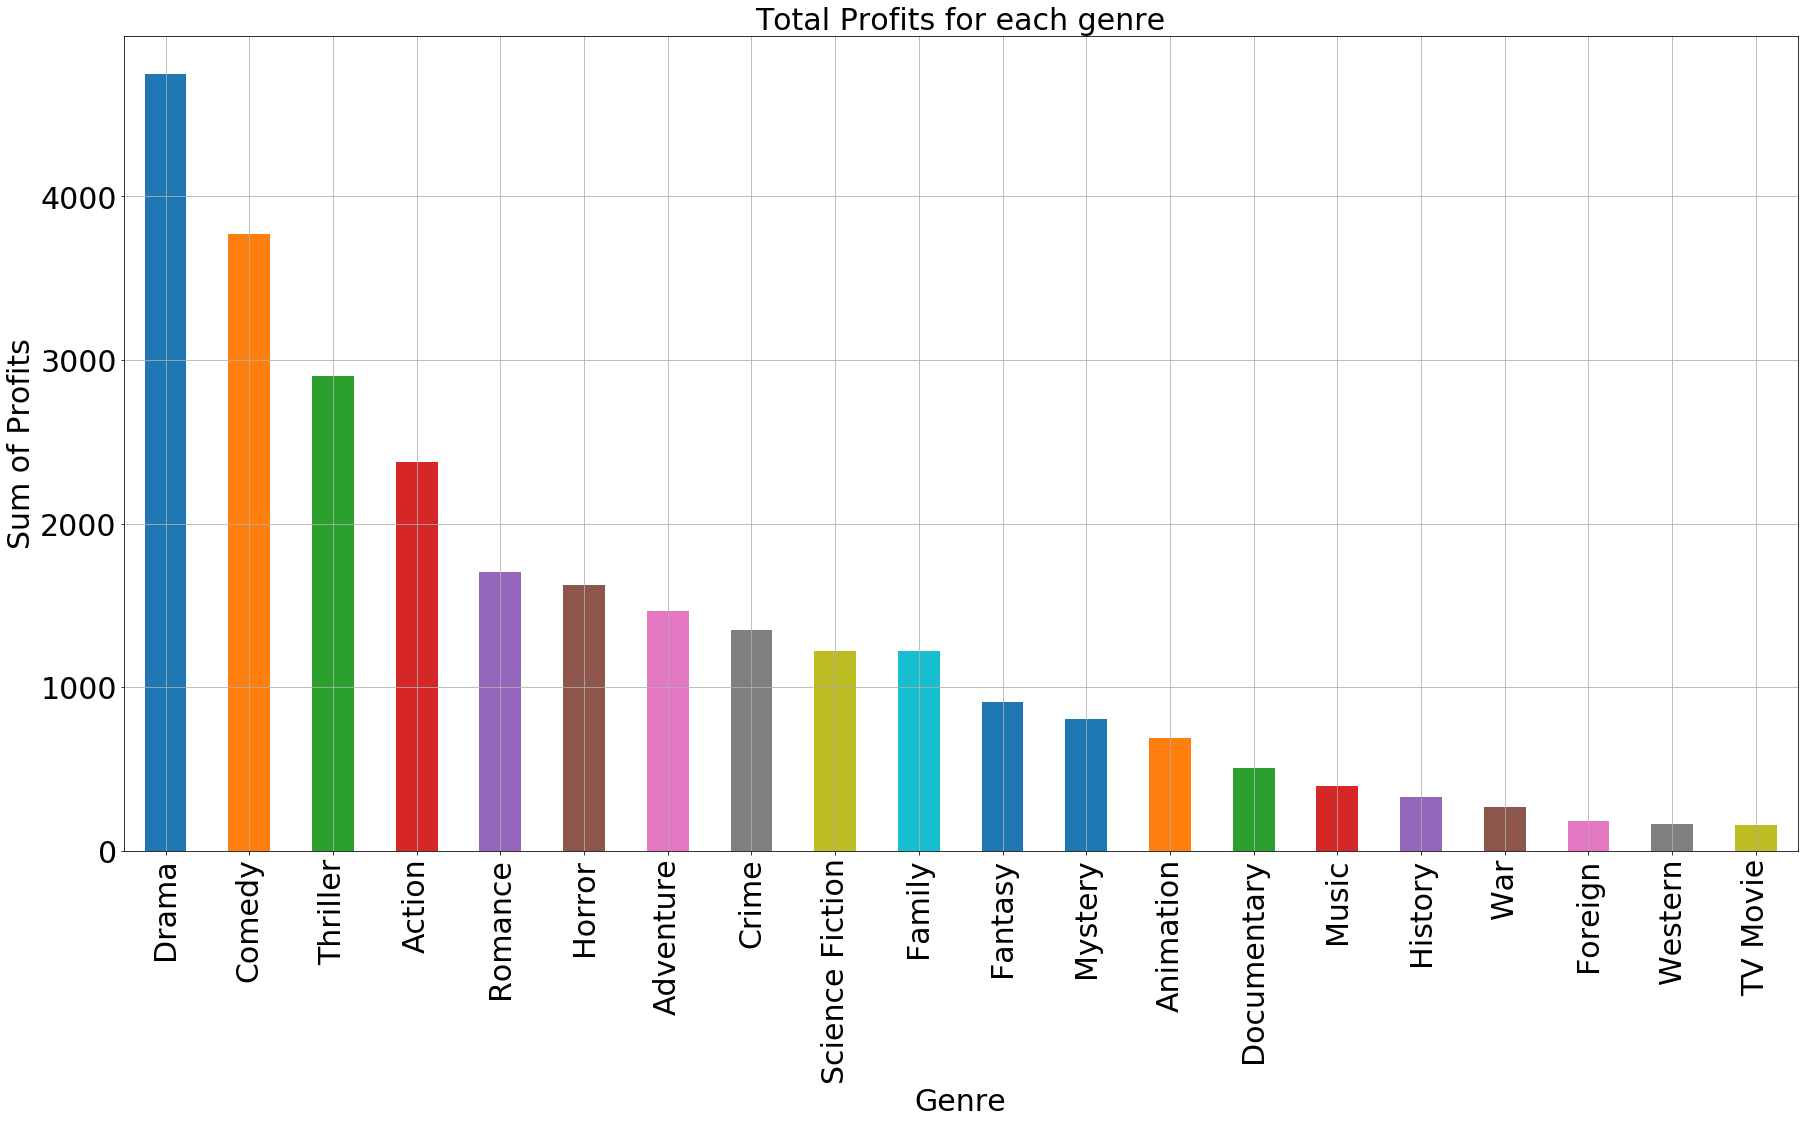

In [24]:
# plot the total profit generated by each genre

genre_profit_growth = genre_profit_growth.sum().sort_values(ascending = False)

plot_graph(genre_profit_growth, 'Bar', 'Total Profits for each genre', 'Genre', 'Sum of Profits')

The bar chart above shows that drama generated more profit over the years while TV series generated the least profit.

### Research Question 2: Does movie runtime has an impact on voting? (that is, if people prefer long or short movies) and what impact does it have on average profits?

In [25]:
df_movies.describe().runtime

count    10772.000000
mean       102.455347
std         30.379156
min          2.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

looking at the summary statistics above, we realise that the minimum runtime is 2 minutes while the maximum runtime is 900 minutes. Now, I will categorize the runtime as very_long, long, normal and short, using the above information. 

In [26]:
runtime_category = [2, 90, 99, 112, 900]
runtime_category_label = ['short', 'normal', 'long', 'very long']


In [27]:
# Creates runtime_levels column
df_movies['runtime_levels'] = pd.cut(df_movies['runtime'], runtime_category, labels=runtime_category_label)

# Checks for successful creation of this column
df_movies.head()

,popularity,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_month,runtime_levels
0,32.985763,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,...,0,0,0,1,0,1,0,0,June,very long
1,28.419936,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,...,0,0,0,1,0,1,0,0,May,very long
2,13.112507,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,...,0,0,0,1,0,1,0,0,March,very long
3,11.173104,J.J. Abrams,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,...,0,0,0,1,0,0,0,0,December,very long
4,9.335014,James Wan,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,...,0,0,0,0,0,1,0,0,April,very long


In [28]:
df_movies.groupby('runtime_levels').mean().vote_count

runtime_levels
short         85.034984
normal       145.729781
long         205.960179
very long    461.395212
Name: vote_count, dtype: float64

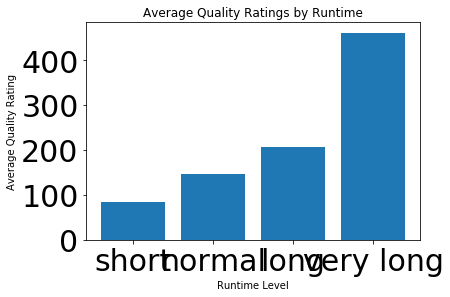

In [29]:
voting_mean = df_movies.groupby('runtime_levels').mean().vote_count

locations = [1, 2, 3, 4] 

plt.bar(locations, voting_mean, tick_label=runtime_category_label)
plt.title('Average Quality Ratings by Runtime')
plt.xlabel('Runtime Level')
plt.ylabel('Average Quality Rating')
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=10)

The implication of the above chart is that, many viewers seem to prefer movies having runtime between 112 to 900 minutes. Does this have an impact on the profit?

In [30]:
profit_mean = df_movies.groupby('runtime_levels').mean().profit_adj
profit_mean

runtime_levels
short        2.433904e+07
normal       3.251090e+07
long         4.044026e+07
very long    9.197827e+07
Name: profit_adj, dtype: float64

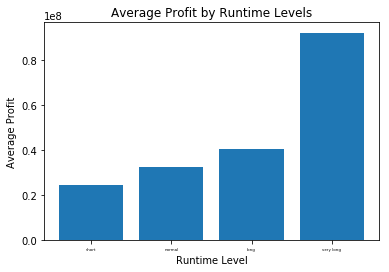

In [31]:
plt.bar(locations, profit_mean, tick_label=runtime_category_label)
plt.title('Average Profit by Runtime Levels')
plt.xlabel('Runtime Level')
plt.ylabel('Average Profit')
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=10)

Yes! Movies with very long runtime generated more profits.

### Research Question 3: Does the movie release month has an impact on its profitability?

In [32]:
#sort the dataframe with the release date
df_movies_months = df_movies.groupby('release_month')['profit_adj'].sum()

df_movies_months

release_month
April        3.116873e+10
August       2.791025e+10
December     7.508987e+10
February     1.858132e+10
January      1.995418e+10
July         5.395760e+10
June         7.018137e+10
March        3.534714e+10
May          5.243060e+10
November     5.008918e+10
October      3.655157e+10
September    2.808418e+10
Name: profit_adj, dtype: float64

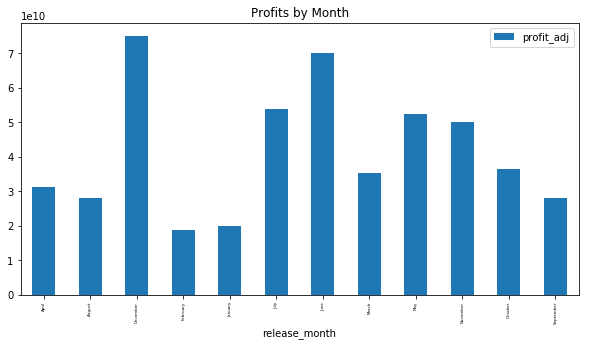

In [33]:
df_movies_months.to_frame().sort_values('release_month').plot(kind='bar', figsize=(10,5), title='Profits by Month');
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

The most profitable months seem to be December and June, while January is the least profitable month. 

### Research Question 4: It would also be interesting to find out who directed most movies between 1960 to 2015

In [34]:
#check the total number of directors

df_movies.director.nunique()

5039

In [35]:
#check the top 20 directors and corresponding number of movies directed

df_movies.groupby('director')['director'].value_counts().sort_values(ascending=False).head(20)

director           director         
Woody Allen        Woody Allen          45
Clint Eastwood     Clint Eastwood       34
Steven Spielberg   Steven Spielberg     29
Martin Scorsese    Martin Scorsese      29
Ridley Scott       Ridley Scott         23
Ron Howard         Ron Howard           22
Steven Soderbergh  Steven Soderbergh    22
Joel Schumacher    Joel Schumacher      21
Brian De Palma     Brian De Palma       20
Barry Levinson     Barry Levinson       19
Wes Craven         Wes Craven           19
Tim Burton         Tim Burton           19
David Cronenberg   David Cronenberg     18
Rob Reiner         Rob Reiner           18
John Carpenter     John Carpenter       18
Mike Nichols       Mike Nichols         18
Sidney Lumet       Sidney Lumet         17
Renny Harlin       Renny Harlin         17
Walter Hill        Walter Hill          17
Peter Hyams        Peter Hyams          17
Name: director, dtype: int64

Wow! Woody Allen directed most movies

### Research Question 5: Is there any relationship between movies budget and popularity?

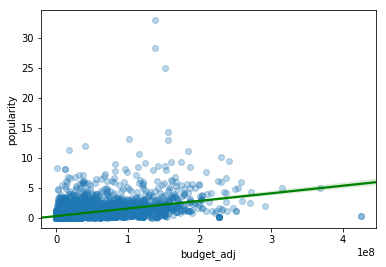

In [36]:
#I will check the correlation between movies budget and popularity using seaborn

sns.regplot(x='budget_adj', y='popularity', data=df_movies, scatter_kws={'alpha':0.3}, line_kws={'color':'green'});

Hmmm! The scarterplot above shows that, the more the budget the higher the popularity. 

<a id='conclusions'></a>
## Conclusions

The following are my discoveries from the movie dataset;
- There has been an increase in the amount of profits made over the years from 1960 to 2015,
- drama and comedy generated more money than any other genre while TV drama generated the least,
- many viewers rated long duration movies over short duration which made the former to generate more profits,
- more money is generated in december and june, 
- Woody Allen directed more movies than other directors, and
- popularity of movies grows according to the budget. 



### Limitations
- In the process of cleaning data, we discovered that many rows has 0 budget_adj and revenue_adj values. forwarfilling might not be the best way to handle this and may result in inaccuracy of analysis, hence, more sophisticated method is adviced. 


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0